In [1]:
# 1 Download some Argo data using argopy.
# -Aim for 15 years of data in a 20deg by 20deg box - i.e., all Argo data in a given region since 2005.
# -The more data the better for estimating the covariance parameters.  When we compute the likelihood, we can just divide the data into chunks of time (each year, or 6 month period, e.g.) and treat each as an independent realizaton, which simplifies the computations considerably.
# -Pick a location of your choice!

In [2]:
from argopy import DataFetcher as ArgoDataFetcher

PROJ: proj_create_from_database: Cannot find proj.db


In [3]:
ilat = -10
flat = 10 + 1
ilon = -130
flon = -110 + 1
idepth = 100
fdepth = 300
idate = "2005-01-01"
fdate = "2005-03-31"
ds = (
    ArgoDataFetcher()
    .region([ilon, flon, ilat, flat, idepth, fdepth, idate, fdate])
    .to_xarray()
)
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 1556)
Coordinates:
    LONGITUDE        (N_POINTS) float64 -127.4 -127.4 -127.4 ... -125.4 -125.4
    LATITUDE         (N_POINTS) float64 9.465 9.465 9.465 ... 3.222 3.222 3.222
    TIME             (N_POINTS) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-27T18:42:42
  * N_POINTS         (N_POINTS) int32 0 1 2 3 4 5 ... 1551 1552 1553 1554 1555
Data variables:
    CYCLE_NUMBER     (N_POINTS) int32 81 81 81 81 81 81 81 81 ... 1 1 1 1 1 1 1
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 5900232 5900232 ... 5900839 5900839
    POSITION_QC      (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 105.4 115.3 125.5 ... 270.3 284.3 298.4
    PRES_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 34.71 34.71 34.73 ... 34.83 34.81 34.8
    PSAL_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 12.28 12.06 11.83 ... 11.88 11.62 11.42
    TEMP_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gerar
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [4]:
argo_profiles = ds.argo.point2profile()
argo_profiles

<xarray.Dataset>
Dimensions:          (N_LEVELS: 22, N_PROF: 76)
Coordinates:
  * N_PROF           (N_PROF) int32 57 40 66 32 0 8 16 ... 23 31 56 75 48 65 74
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    LATITUDE         (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
    LONGITUDE        (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
    TIME             (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-27T18:42:42
Data variables:
    CYCLE_NUMBER     (N_PROF) int32 81 67 10 26 68 68 68 ... 75 75 75 1 75 89 1
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5900232 4900313 5900646 ... 5900232 5900839
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float64 105.4 115.3 ... 284.3 298.4
    PRES_QC          (N_PROF) int32 1 2 1 2 2 2 2 2 1 1 ... 2 2 2 2 2 1 1 2 1 1
    PSAL             (N_PROF, N_LEVELS) float64 34.71 34.71 34.73 ... 34.81 34.8
    PSAL_QC          (N_PROF) int32 1 2 1 2 1 2 2 2 1 1 ... 1 2 2 2 2 1 1 2 1 1
    TEMP             (N_PROF, N_LEVELS) float64 12.28 12.06 ... 11.62 11.42
    TEMP_QC          (N_PROF) int32 1 2 1 2 1 2 2 2 1 1 ... 1 2 2 2 2 1 1 2 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gerar
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [5]:
# 2 Interpolate each profile vertically onto a pressure/depth surface of your choice

In [6]:
argo_interp = argo_profiles.argo.interp_std_levels([250])
argo_interp

<xarray.Dataset>
Dimensions:            (N_PROF: 76, PRES_INTERPOLATED: 1)
Coordinates:
  * N_PROF             (N_PROF) int32 57 40 66 32 0 8 16 ... 31 56 75 48 65 74
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int32 250
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-27T18:42:42
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 81.0 67.0 10.0 26.0 ... 75.0 89.0 1.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 5.9e+06 4.9e+06 ... 5.9e+06 5.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float64 250.0 250.0 ... 250.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float64 34.71 34.73 ... 34.85
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gerar
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [7]:
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP"]]
selected_vars

<xarray.Dataset>
Dimensions:            (N_PROF: 76, PRES_INTERPOLATED: 1)
Coordinates:
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-27T18:42:42
  * N_PROF             (N_PROF) int32 57 40 66 32 0 8 16 ... 31 56 75 48 65 74
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int32 250
Data variables:
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gerar
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [8]:
# 3 Find the "mean state" of temperature by fitting 2d polynomials using a least squares fit.
# -It may also be important to add a seasonal cycle, modeled as a linear combination of seasonal harmonics

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
from typing import Iterable


def get_harmonics(nharmonics, time, period=365):
    """Compute the requested number of harmonics
    for a set time.
    
    Parameters
    ----------
    nharmonics : int
        Number of harmonics to compute
    time : int, Iterable
        Time point within period of oscillation.
        This can be either a single int or a 1d-array
    period : int, optional
        Period of oscillation
        
    Returns
    -------
    harmonics: 2d-array
        Array of shape (len(time), nharmonics*2) where
        nharmonics*2 accounts for the cos and sin terms.
    """
    harmonics = np.arange(1, nharmonics + 1)
    if isinstance(time, Iterable):
        time = np.asarray(time)[:, np.newaxis]
        harmonics = harmonics[np.newaxis, :]
    phase = 2 * np.pi * harmonics * time / period
    return np.concatenate([np.cos(phase), np.sin(phase)], axis=-1)


def build_basis(lat, lon, time, nharmonics):
    """Build the 2d local polynomial regression basis
    according to Park2020
    """
    local_polynomlial_reg = np.ones((*lat.shape, 6 + nharmonics * 2))
    local_polynomlial_reg[..., 1] = lon
    local_polynomlial_reg[..., 2] = lat
    local_polynomlial_reg[..., 3] = lon * lat
    local_polynomlial_reg[..., 4] = lon ** 2
    local_polynomlial_reg[..., 5] = lat ** 2
    local_polynomlial_reg[..., 6:] = get_harmonics(nharmonics, time)
    return local_polynomlial_reg


def find_mean_state(lat, lon, time, data, nharmonics=2):
    """Find the mean state
    
    Parameters
    ----------
    lat, lon, time, data : 1d-array
        Arrays containing latitude, longitude, day of year and
        data.
    nharmonics: int, optional
        Number of harmonics to add into the basis functions
    """
    return lsq_linear(build_basis(lat, lon, time, nharmonics), data)

In [10]:
mean_state_fit = find_mean_state(
    selected_vars.LATITUDE,
    selected_vars.LONGITUDE,
    selected_vars.TIME.dt.dayofyear,
    selected_vars.TEMP.data.flatten(),
)
mean_state_fit

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 7.483616564532259
         fun: array([ 0.16926511,  0.14609991, -0.6308705 , -0.1421511 , -0.05069652,
       -0.34793902, -0.13721604,  0.69966104,  0.63837689, -0.02203378,
        0.18588829, -0.46418286,  0.00903633, -0.11147817, -0.15377594,
       -0.05766174, -0.33710223,  0.66454641, -0.15616073, -0.16602798,
       -0.60269639,  0.19607102, -0.14302369, -0.11055621, -0.18120937,
        0.5178851 ,  0.87690062, -0.15707167,  0.08110754, -0.74363138,
        0.35442018,  0.3193874 ,  0.0159411 ,  0.14901831, -0.1153081 ,
        0.85413791,  0.12684599, -0.15315853, -0.55147635,  0.22573403,
        0.04451875, -0.14513155, -0.22075426, -0.32323777,  0.46263424,
       -0.30521813, -0.30931618, -0.83439676,  0.17875969, -0.31936098,
        0.34786892,  0.03662904,  1.00664088,  0.15743499, -0.20687   ,
       -0.40613403, -0.98195006,  0.20404723, -0.09531576,  0.39868155,
        0.00401437,  1.12866

In [11]:
lat = np.arange(ilat, flat)
lon = np.arange(ilon, flon)
llon, llat = np.meshgrid(lon, lat)
mean_state = np.matmul(build_basis(llat, llon, 40, 2), mean_state_fit.x)

In [12]:
xmean_state = xr.DataArray(mean_state, coords=[("lat", lat), ("lon", lon)])
xmean_state

<xarray.DataArray (lat: 21, lon: 21)>
array([[15.42753801, 15.37138989, 15.2826996 , 15.16146713, 15.00769248,
        14.82137565, 14.60251664, 14.35111546, 14.0671721 , 13.75068656,
        13.40165885, 13.02008895, 12.60597688, 12.15932263, 11.6801262 ,
        11.1683876 , 10.62410682, 10.04728386,  9.43791872,  8.7960114 ,
         8.12156191],
       [14.94671001, 14.91181757, 14.84438294, 14.74440613, 14.61188715,
        14.44682599, 14.24922266, 14.01907714, 13.75638945, 13.46115958,
        13.13338753, 12.7730733 , 12.3802169 , 11.95481832, 11.49687756,
        11.00639462, 10.48336951,  9.92780221,  9.33969274,  8.71904109,
         8.06584727],
       [14.48443133, 14.47079455, 14.42461559, 14.34589446, 14.23463114,
        14.09082565, 13.91447798, 13.70558813, 13.46415611, 13.19018191,
        12.88366553, 12.54460697, 12.17300623, 11.76886332, 11.33217823,
        10.86295096, 10.36118151,  9.82686988,  9.26001608,  8.6606201 ,
         8.02868194],
       [14.04070196, 14.04832085, 14.02339756, 13.96593209, 13.87592445,
        13.75337462, 13.59828262, 13.41064844, 13.19047208, 12.93775355,
        12.65249284, 12.33468994, 11.98434488, 11.60145763, 11.18602821,
        10.7380566 , 10.25754283,  9.74448687,  9.19888873,  8.62074842,
         8.01006593],
       [13.61552191, 13.64439646, 13.64072884, 13.60451904, 13.53576706,
        13.4344729 , 13.30063657, 13.13425806, 12.93533737, 12.7038745 ,
        12.43986946, 12.14332223, 11.81423283, 11.45260125, 11.0584275 ,
        10.63171156, 10.17245345,  9.68065316,  9.1563107 ,  8.59942605,
         8.00999923],
       [13.20889116, 13.25902139, 13.27660943, 13.2616553 , 13.21415899,
        13.1341205 , 13.02153983, 12.87641699, 12.69875197, 12.48854477,
        12.24579539, 11.97050384, 11.6626701 , 11.32229419, 10.9493761 ,
        10.54391584, 10.10591339,  9.63536877,  9.13228197,  8.596653  ,
         8.02848184],
       [12.82080973, 12.89219562, 12.93103934, 12.93734087, 12.91110023,
        12.85231741, 12.76099241, 12.63712523, 12.48071588, 12.29176435,
        12.07027064, 11.81623475, 11.52965668, 11.21053644, 10.85887402,
        10.47466942, 10.05792265,  9.60863369,  9.12680256,  8.61242925,
         8.06551376],
       [12.45127761, 12.54391917, 12.60401855, 12.63157576, 12.62659078,
        12.58906363, 12.5189943 , 12.41638279, 12.2812291 , 12.11353324,
        11.9132952 , 11.68051498, 11.41519258, 11.117328  , 10.78692125,
        10.42397232, 10.02848121,  9.60044793,  9.13987246,  8.64675482,
         8.121095  ],
       [12.10029481, 12.21419203, 12.29554708, 12.34435995, 12.36063065,
        12.34435916, 12.2955455 , 12.21418966, 12.10029164, 11.95385144,
        11.77486907, 11.56334452, 11.31927779, 11.04266888, 10.73351779,
        10.39182453, 10.01758909,  9.61081147,  9.17149168,  8.6996297 ,
         8.19522555],
       [11.76786132, 11.90301421, 12.00562492, 12.07569346, 12.11321982,
        12.11820401, 12.09064601, 12.03054584, 11.93790349, 11.81271896,
        11.65499225, 11.46472337, 11.24191231, 10.98655907, 10.69866365,
        10.37822605, 10.02524628,  9.63972433,  9.2216602 ,  8.7710539 ,
         8.28790541],
       [11.45397713, 11.6103857 , 11.73425208, 11.82557629, 11.88435831,
        11.91059816, 11.90429584, 11.86545133, 11.79406465, 11.69013579,
        11.55366475, 11.38465153, 11.18309614, 10.94899857, 10.68235882,
        10.38317689, 10.05145278,  9.6871865 ,  9.29037804,  8.8610274 ,
         8.39913459],
       [11.15864227, 11.33630649, 11.48142855, 11.59400842, 11.67404612,
        11.72154163, 11.73649497, 11.71890614, 11.66877512, 11.58610193,
        11.47088656, 11.32312901, 11.14282928, 10.92998738, 10.6846033 ,
        10.40667704, 10.0962086 ,  9.75319798,  9.37764519,  8.96955022,
         8.52891307],
       [10.88185671, 11.08077661, 11.24715433, 11.38098987, 11.48228323,
        11.55103442, 11.58724342, 11.59091025, 11.56203491, 11.50061738,
        11.40665768, 11.2801558 , 11.12111174, 1

In [13]:
# 4 plot the original data and the mean state and make sure it looks sensible

In [14]:
plot_kwargs = dict(cmap="viridis", vmax=15, vmin=7)

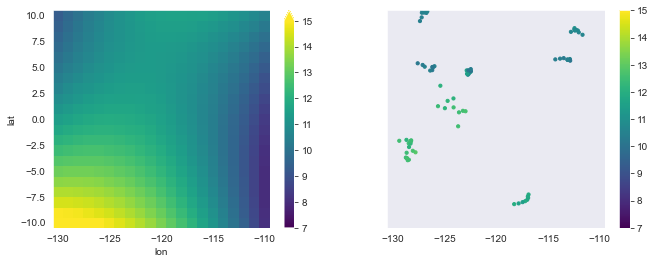

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(11, 4), sharey=True, sharex=True)

xmean_state.plot(ax=ax[0], **plot_kwargs)

scat = ax[1].scatter(
    selected_vars.LONGITUDE.data,
    selected_vars.LATITUDE.data,
    c=selected_vars.TEMP.data.flatten(),
    s=10,
    **plot_kwargs
)

for axes in ax:
    axes.set_aspect("equal")

plt.colorbar(scat)

In [ ]:
# 5 remove the "mean state" from the original data